In [ ]:
# Install Library
!pip install mlxtend

In [ ]:
# Import Data
import pandas as pd

df = pd.read_csv('../00_Dataset/Customer Preference Survey (Responses) - Form Responses 1.csv')

In [ ]:
df.head(5)

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,10/17/2021 17:29:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [ ]:
# Drop Columns: Timestamp, PS5
df.drop(['Timestamp','PS5'],axis=1,inplace=True)

In [ ]:
# Check NaN rows
df[df.isna().any(axis=1)]

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,NaN,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ
8,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ
11,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,NaN,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ
12,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,NaN,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,NaN,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
16,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,NaN,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ
38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,NaN,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคย,ไม่เคย,ไม่เคยซือ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ


In [ ]:
# Drop Row 0 -> All NaN
df.dropna(how='all',inplace=True)

In [ ]:
# Check NaN rows
missing = df.isnull().sum()
print(missing)

playstation5                     0
เครื่องทำขนมปัง                  0
Ergonomic Wrist Rest             0
เครื่องอบผ้า                     0
เครื่องชงกาแฟแคปซูล              0
เก้าอี้ LA-Z-Boy                 0
เครื่องให้อาหารสัตว์อัตโนมัติ    0
บัตตาเลี่ยน                      1
แก้วเก็บความเย็น                 0
ลู่วิ่งออกกำลังกาย               0
Kindle                           0
เครื่องซักผ้า                    0
Bluetooth Speaker                0
ห้องน้ำแมวอัตโนมัติ              0
ทรายแมว                          0
ลำโพง pixel                      0
Logitech Mx Master 3 Mouse       0
ตุ๊กตา ty                        0
น้ำพุแมว                         0
Robot ดูดฝุ่น                    0
Mechanical keyboard              1
Nintendo switch                  1
หนังสือ python                   0
gaming chair                     1
Deskmat                          0
Dew - ไฟโรเซ่                    0
เทียนหอม jo malone               0
กระติกน้ำ 2 ลิตร                 1
ที่นอน memory form  

In [ ]:
# Convert answer to 0,1
def cvt_answer(ans):
  if ans == 'ไม่เคยซื้อ' or ans == 'ไม่เคย':
    return 0
  elif ans == 'เคย' or ans == 'เคยซื้อ':
    return 1
  else:
    return 0

In [ ]:
# Convert answer to 0,1
df = df.applymap(cvt_answer)
df.head()

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0
3,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
5,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0


In [ ]:
# Check values
for i in df.columns.values:
  print('|'*50)
  print(i)
  print(df[i].value_counts())

||||||||||||||||||||||||||||||||||||||||||||||||||
playstation5
0    45
1     1
Name: playstation5, dtype: int64
||||||||||||||||||||||||||||||||||||||||||||||||||
เครื่องทำขนมปัง
0    43
1     3
Name: เครื่องทำขนมปัง, dtype: int64
||||||||||||||||||||||||||||||||||||||||||||||||||
Ergonomic Wrist Rest
0    44
1     2
Name: Ergonomic Wrist Rest, dtype: int64
||||||||||||||||||||||||||||||||||||||||||||||||||
เครื่องอบผ้า
0    40
1     6
Name: เครื่องอบผ้า, dtype: int64
||||||||||||||||||||||||||||||||||||||||||||||||||
เครื่องชงกาแฟแคปซูล
0    30
1    16
Name: เครื่องชงกาแฟแคปซูล, dtype: int64
||||||||||||||||||||||||||||||||||||||||||||||||||
เก้าอี้ LA-Z-Boy
0    44
1     2
Name: เก้าอี้ LA-Z-Boy, dtype: int64
||||||||||||||||||||||||||||||||||||||||||||||||||
เครื่องให้อาหารสัตว์อัตโนมัติ
0    44
1     2
Name: เครื่องให้อาหารสัตว์อัตโนมัติ, dtype: int64
||||||||||||||||||||||||||||||||||||||||||||||||||
บัตตาเลี่ยน
0    33
1    13
Name: บัตตาเลี่ยน, dtype: int64
||||||||||||||||||||

In [ ]:
# Product
df.columns.unique()

Index(['playstation5', 'เครื่องทำขนมปัง', 'Ergonomic Wrist Rest',
       'เครื่องอบผ้า', 'เครื่องชงกาแฟแคปซูล', 'เก้าอี้ LA-Z-Boy',
       'เครื่องให้อาหารสัตว์อัตโนมัติ', 'บัตตาเลี่ยน', 'แก้วเก็บความเย็น',
       'ลู่วิ่งออกกำลังกาย', 'Kindle', 'เครื่องซักผ้า', 'Bluetooth Speaker',
       'ห้องน้ำแมวอัตโนมัติ', 'ทรายแมว', 'ลำโพง pixel',
       'Logitech Mx Master 3 Mouse', 'ตุ๊กตา ty', 'น้ำพุแมว', 'Robot ดูดฝุ่น',
       'Mechanical keyboard', 'Nintendo switch', 'หนังสือ python',
       'gaming chair', 'Deskmat', 'Dew - ไฟโรเซ่', 'เทียนหอม jo malone',
       'กระติกน้ำ 2 ลิตร', 'ที่นอน memory form', 'พลาสเตอร์บรรเทาปวด ตราเสือ',
       'การ์ดจอ RTX 3080', 'ขนมจีนน้ำยาปู', 'Salmon Sashimi',
       'จักรยานเสือหมอบ', 'ไฟแต่งห้องมินิมอล', 'External Harddisk',
       'หม้อทอดไร้น้ํามัน', 'airpods ', 'ยาดม', 'ไฟส่องหน้าไลฟ์สด'],
      dtype='object')

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by='lift',ascending=False)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
386746,"(ยาดม, พลาสเตอร์บรรเทาปวด ตราเสือ, airpods , ข...","(เครื่องซักผ้า, ลู่วิ่งออกกำลังกาย)",0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826
581512,"(ยาดม, Mechanical keyboard, หม้อทอดไร้น้ํามัน,...","(Salmon Sashimi, ขนมจีนน้ำยาปู, แก้วเก็บความเย...",0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826
769917,"(Salmon Sashimi, แก้วเก็บความเย็น, เครื่องซักผ...","(ยาดม, Mechanical keyboard, External Harddisk,...",0.108696,0.130435,0.108696,1.000000,7.666667,0.094518,inf
723042,"(ยาดม, Salmon Sashimi, External Harddisk, ลู่ว...","(airpods , ขนมจีนน้ำยาปู, หม้อทอดไร้น้ํามัน, พ...",0.108696,0.130435,0.108696,1.000000,7.666667,0.094518,inf
625213,"(Salmon Sashimi, ขนมจีนน้ำยาปู, เครื่องซักผ้า,...","(ยาดม, Mechanical keyboard, หม้อทอดไร้น้ํามัน,...",0.108696,0.130435,0.108696,1.000000,7.666667,0.094518,inf
723076,"(พลาสเตอร์บรรเทาปวด ตราเสือ, Salmon Sashimi, a...","(ยาดม, External Harddisk, เครื่องซักผ้า, ลู่วิ...",0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826
603387,"(Salmon Sashimi, airpods , เครื่องซักผ้า, หนัง...","(Bluetooth Speaker, Mechanical keyboard, หม้อท...",0.108696,0.130435,0.108696,1.000000,7.666667,0.094518,inf
775634,"(ยาดม, Bluetooth Speaker, Mechanical keyboard,...","(Salmon Sashimi, airpods , เครื่องซักผ้า, หนัง...",0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826
769907,"(Salmon Sashimi, External Harddisk, เครื่องซัก...","(ยาดม, Mechanical keyboard, แก้วเก็บความเย็น, ...",0.108696,0.130435,0.108696,1.000000,7.666667,0.094518,inf
589705,"(ยาดม, เครื่องซักผ้า, ลู่วิ่งออกกำลังกาย)","(พลาสเตอร์บรรเทาปวด ตราเสือ, Salmon Sashimi, a...",0.108696,0.130435,0.108696,1.000000,7.666667,0.094518,inf


In [ ]:
fn_rules = rules[(rules['lift'] >= 1.2) &
      (rules['confidence'] >= 0.6) &
      (rules['confidence'] < 1) &
      (rules['antecedents'].apply( lambda x:len(x))==1) &
      (rules['consequents'].apply( lambda x:len(x))==1)]
fn_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
194,(ทรายแมว),(น้ำพุแมว),0.130435,0.108696,0.108696,0.833333,7.666667,0.094518,5.347826
6,(เครื่องอบผ้า),(กระติกน้ำ 2 ลิตร),0.130435,0.217391,0.108696,0.833333,3.833333,0.080340,4.695652
19,(Logitech Mx Master 3 Mouse),(เครื่องชงกาแฟแคปซูล),0.130435,0.347826,0.108696,0.833333,2.395833,0.063327,3.913043
115,(ลู่วิ่งออกกำลังกาย),(airpods ),0.173913,0.456522,0.152174,0.875000,1.916667,0.072779,4.347826
102,(ลู่วิ่งออกกำลังกาย),(หนังสือ python),0.173913,0.500000,0.152174,0.875000,1.750000,0.065217,4.000000
147,(กระติกน้ำ 2 ลิตร),(เครื่องซักผ้า),0.217391,0.521739,0.195652,0.900000,1.725000,0.082231,4.782609
214,(กระติกน้ำ 2 ลิตร),(Robot ดูดฝุ่น),0.217391,0.347826,0.130435,0.600000,1.725000,0.054820,1.630435
145,(เทียนหอม jo malone),(เครื่องซักผ้า),0.152174,0.521739,0.130435,0.857143,1.642857,0.051040,3.347826
131,(ทรายแมว),(เครื่องซักผ้า),0.130435,0.521739,0.108696,0.833333,1.597222,0.040643,2.869565
138,(Nintendo switch),(เครื่องซักผ้า),0.130435,0.521739,0.108696,0.833333,1.597222,0.040643,2.869565


In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

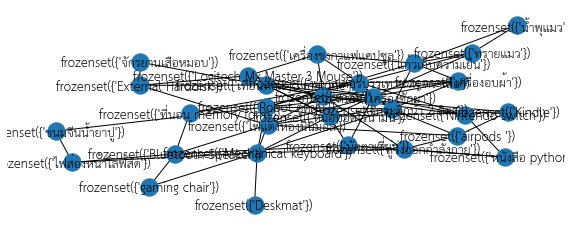

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import math 
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(fn_rules,source='antecedents',target='consequents')
pos = nx.spring_layout(GA)
nx.draw(GA,pos=pos,with_labels=True,font_family='TH Sarabun New')
plt.show()

In [ ]:
item_item_matrix = pd.DataFrame(index=df.columns,columns=df.columns)

In [ ]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(df.iloc[:,i],df.iloc[:,j])

In [ ]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [ ]:
links_filtered=links.loc[ (links['value'] > 0.8) & 
                         (links['item'] != links['related item']) ]

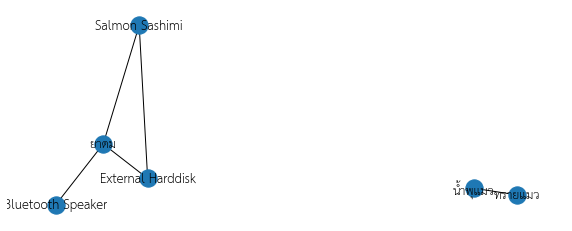

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True,font_family='TH Sarabun New')
plt.show()

Summary

Product ที่นักเรียน BADS วิชา CRM มักจะมีไว้ครอบครองจะเป็น 
1.  ซื้อ **ทรายแมว** แล้วซื้อ **น้ำพุแมว**  
ด้วย Support 10.86%, Confidence 100% และ Lift 7.67 -> แนะนำคนที่ซื้อ ทรายแมว ให้ซื้อ น้ำพุแมว
2. 	ซื้อ **เครื่องอบผ้า** แล้วซื้อ **กระติกน้ำ 2 ลิตร**  
ด้วย Support 10.86%, Confidence 100% และ Lift 3.83 -> แนะนำคนที่ซื้อ เครื่องอบผ้า ให้ซื้อ กระติกน้ำ 2 ลิตร
3. ซื้อ **Logitech Mx Master 3 Mouse** แล้วซื้อ **เครื่องชงกาแฟแคปซูล**  
ด้วย Support 10.86%, Confidence 100% และ Lift 2.40 -> แนะนำคนที่ซื้อ Logitech Mx Master 3 Mouse ให้ซื้อ เครื่องชงกาแฟแคปซูล

ยาดมเยียวยาทุกสิ่ง